## Snorkel Validation 1
In this notebook, we will use a modified version of `snorkel_original` with 3 label functions and a sample of 200 research articles. Our goal will be to validate the snorkel labeling functionality with semantic similarity at a smaller scale. We will only look at whether articles are computer science articles or not.

### Computing semantic similarity scores and Snorkel output

In [1]:
from snorkel.labeling import labeling_function
from snorkel.labeling.model import LabelModel
from snorkel.labeling import PandasLFApplier
import pandas as pd
from sentence_transformers import SentenceTransformer, util

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
df = pd.read_excel("data/snorkel_sample.xlsx")
df

,abstract,LF_1_CS,LF_2_CS,LF_3_CS
0,Predictive models allow subject-specific inf...,0.065778,0.160896,0.250593
1,Rotation invariance and translation invarian...,0.116622,-0.004507,0.422111
2,We introduce and develop the notion of spher...,0.046203,0.065532,0.324282
3,The stochastic Landau--Lifshitz--Gilbert (LL...,-0.021727,-0.043504,0.341957
4,Fourier-transform infra-red (FTIR) spectra o...,0.020897,-0.081648,0.355184
...,...,...,...,...
195,We relate the concepts used in decentralized...,0.229318,0.383580,0.548017
196,Time-varying network topologies can deeply i...,0.000179,0.024527,0.424461
197,A long-standing obstacle to progress in deep...,-0.008347,-0.053800,0.351851
198,We study the band structure topology and eng...,-0.037710,-0.111807,0.258891


In [3]:
df_defi = pd.read_excel("data/research_defs.xlsx")

In [4]:
df_labeled = pd.DataFrame()
df_labeled['abstract'] = df['abstract']

computer_science = 1 # Identified as a CS research article
ABSTAIN = 0 # Not identified as a CS research article

i=0

In [35]:
    @labeling_function()
    def lf_def_1(x):
      """
      i = 0
      embedder = SentenceTransformer('multi-qa-distilbert-cos-v1')
      list_key = df_defi['DefinitionGPT'].iloc[i] # Definition of field
      def_embedding = embedder.encode(list_key, convert_to_tensor=True)
            # Convert field definition into vector space (tensor) 
      corpus_embeddings = embedder.encode(x, convert_to_tensor=True)
      score = util.pytorch_cos_sim(def_embedding, corpus_embeddings)[0]
      """

      score = df[df['abstract'] == x['abstract']]['LF_1_CS'].values[0]

      if score > 0.5:
       return computer_science  
      return ABSTAIN


    @labeling_function()
    def lf_def_2(x):
      """
      i = 0
      embedder = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
      list_key = df_defi['Definition'].iloc[i]
      def_embedding = embedder.encode(list_key, convert_to_tensor=True)
      corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
      score = util.pytorch_cos_sim(def_embedding, corpus_embeddings)[0]
      """

      score = df[df['abstract'] == x['abstract']]['LF_2_CS'].values[0]  

      if score > 0.5:
       return computer_science  
      return ABSTAIN

    @labeling_function()
    def lf_def_3(x):
      """
      i = 0
      embedder = SentenceTransformer('bert-base-nli-stsb-mean-tokens')
      list_key = df_defi['Definition'].iloc[i]
      def_embedding = embedder.encode(list_key, convert_to_tensor=True)
      corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
      score = util.pytorch_cos_sim(def_embedding, corpus_embeddings)[0]
      """

      score = df[df['abstract'] == x['abstract']]['LF_3_CS'].values[0]

      if score > 0.5:
       return computer_science  
      return ABSTAIN

In [36]:
# Define the set of labeling functions (LFs)
lfs = [lf_def_1, lf_def_2, lf_def_3]

In [37]:
# Apply the LFs to the unlabeled training data
applier = PandasLFApplier(lfs)
L_train = applier.apply(df_labeled)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 915.34it/s]


In [39]:
# Initialize the LabelModel
label_model = LabelModel(cardinality=2, verbose=True)

# Train the LabelModel
label_model.fit(L_train, n_epochs=500, log_freq=100, seed=123)

INFO:root:Computing O...
INFO:root:Estimating \mu...
100%|████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 801.25epoch/s]
INFO:root:Finished Training


In [44]:
# Get the predicted labels (y_train) for the data points
y_train = label_model.predict(L=L_train)
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [41]:
df['Snorkel_CS'] = y_train

### Evaluating semantic similarity scores

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In order to visualize the scores, we need to melt the dataframe

In [58]:
df_scores = df[['LF_1_CS','LF_2_CS','LF_3_CS']]
df_melted = df_scores.melt(var_name='Column', value_name='Value')
df_melted

,Column,Value
0,LF_1_CS,0.065778
1,LF_1_CS,0.116622
2,LF_1_CS,0.046203
3,LF_1_CS,-0.021727
4,LF_1_CS,0.020897
...,...,...
595,LF_3_CS,0.548017
596,LF_3_CS,0.424461
597,LF_3_CS,0.351851
598,LF_3_CS,0.258891


C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

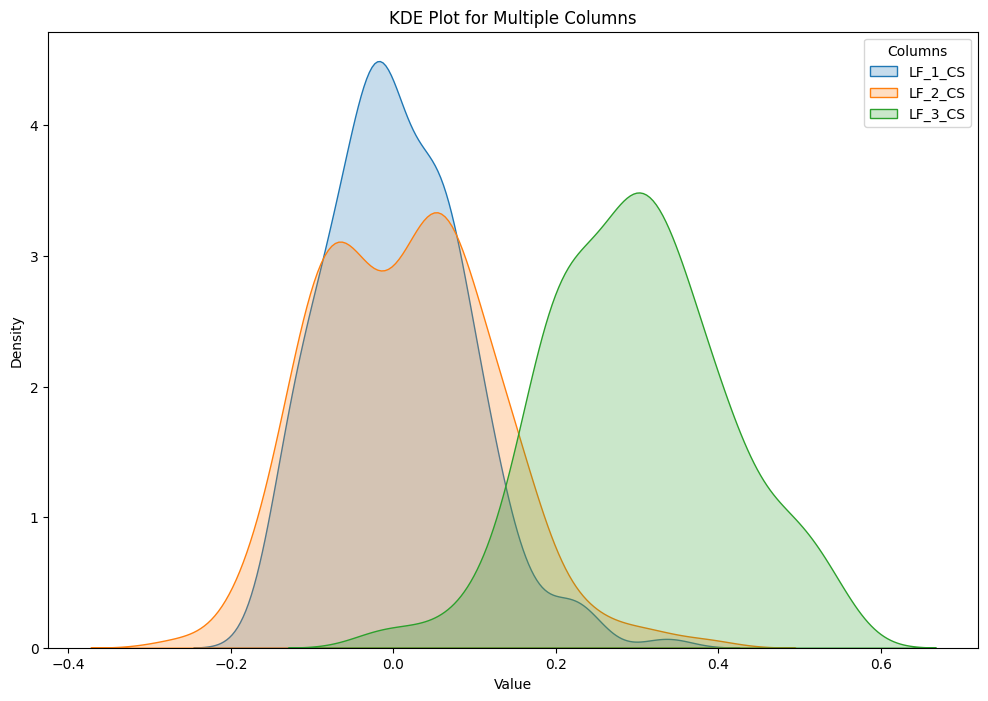

In [67]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot KDE for each column
for column in df_scores.columns:
    sns.kdeplot(df_scores[column], label=column, fill=True)

# Add titles and labels
plt.title('KDE Plot for Multiple Columns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Columns')
plt.show()

The first and second labeling functions did not assign any research article a semantic similarity score of 0.5 or above, which means that it likely skewed the Snorkel model to assign '0' to every article (which is what happened). This result indicates that either: 1) the sentence transformers are not very good, 2) the threshold needs to be lower, 3) we need a better definition.

### Validating Snorkel

We need to bring in the actual computer science results:

In [68]:
df_labeled = pd.read_csv("data/text-classification-train.csv")
df_labeled

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [70]:
df['CS_actual'] = df_labeled['Computer Science'][:200]
df

,abstract,LF_1_CS,LF_2_CS,LF_3_CS,Snorkel_CS,CS_actual
0,Predictive models allow subject-specific inf...,0.065778,0.160896,0.250593,0,1
1,Rotation invariance and translation invarian...,0.116622,-0.004507,0.422111,0,1
2,We introduce and develop the notion of spher...,0.046203,0.065532,0.324282,0,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,-0.021727,-0.043504,0.341957,0,0
4,Fourier-transform infra-red (FTIR) spectra o...,0.020897,-0.081648,0.355184,0,1
...,...,...,...,...,...,...
195,We relate the concepts used in decentralized...,0.229318,0.383580,0.548017,0,0
196,Time-varying network topologies can deeply i...,0.000179,0.024527,0.424461,0,1
197,A long-standing obstacle to progress in deep...,-0.008347,-0.053800,0.351851,0,1
198,We study the band structure topology and eng...,-0.037710,-0.111807,0.258891,0,0


**Accuracy of Snorkel model**:

In [72]:
# Number of actual CS documents
len(df[df['CS_actual'] == 1])

78

In [79]:
snorkel_accuracy = len(df[df['CS_actual'] == df['Snorkel_CS']]) / len(df)
snorkel_accuracy

0.61

In [84]:
# For how many CS documents did it correctly classify as CS documents?
snorkel_pos_accuracy = len(df[(df['CS_actual'] == df['Snorkel_CS']) & (df['CS_actual'] == 1)]) / len(df)
snorkel_pos_accuracy

0.0

Snorkel classified 61% of documents correctly--however, those documents were all documents which *weren't* CS documents. Of those documents which were CS documents, it classified none correctly. This makes sense: as we saw above, the semantic similarity scores were very low for the first and second sentence transformer, which likely played a role in Snorkel's model defaulting to classify every article as not computer science.

In [87]:
df.to_csv("snorkel_sample.csv")

**Redoing all the metrics**

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("data/snorkel_sample_merged.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/snorkel_sample.csv'